In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('hamspam.tsv',sep='\t')

In [6]:
df.columns=['label','Message']

In [7]:
df

,label,Message
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1,ham,"Nah I don't think he goes to usf, he lives aro..."
2,ham,Even my brother is not like to speak with me. ...
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnamin...
5,spam,WINNER!! As a valued network customer you have...
6,spam,Had your mobile 11 months or more? U R entitle...
7,ham,I'm gonna be home soon and i don't want to tal...
8,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
9,spam,URGENT! You have won a 1 week FREE membership ...


In [8]:
df.label.value_counts()

ham     4821
spam     746
Name: label, dtype: int64

In [14]:
df.label.value_counts().index

Index(['ham', 'spam'], dtype='object')

In [15]:
df.label.value_counts().get_values()

array([4821,  746], dtype=int64)

<BarContainer object of 2 artists>

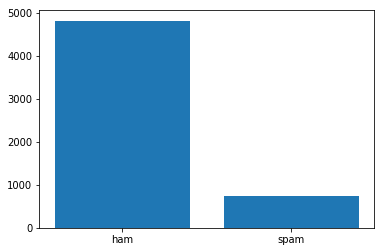

In [16]:
c=df.label.value_counts()
plt.bar(c.index,c.get_values())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5567 entries, 0 to 5566
Data columns (total 2 columns):
label      5567 non-null object
Message    5567 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [19]:
ght=df.copy()
ght.label=ght.label.apply(lambda x:0 if x=='ham' else 1)

([<matplotlib.axis.XTick at 0x270736b6128>,
 <a list of 2 Text xticklabel objects>)

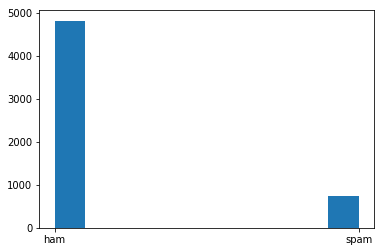

In [24]:
plt.hist(ght.label)
plt.xticks(ticks=[0,1],labels=['ham','spam'])

In [31]:
from sklearn.model_selection import train_test_split
dt=ght.copy()

In [32]:
y=dt['label'].values

In [33]:
x=dt['Message'].values

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=21)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer=CountVectorizer(stop_words='english')
count_vectorizer.fit(x_train)
x_train_converted=count_vectorizer.transform(x_train)

In [52]:
count_test.toarray().shape

(1114, 7436)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model=DecisionTreeClassifier()

In [55]:
model.fit(x_train_converted,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [57]:
x_test_converted=count_vectorizer.transform(x_test)

In [60]:
pred=model.predict(x_test_converted)

In [61]:
y_test==pred

array([ True,  True,  True, ...,  True,  True,  True])

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9775583482944344

In [72]:
a=count_vectorizer.transform(["Winner"])

In [73]:
model.predict(a)

array([1], dtype=int64)